# Character Networks in Sophocles' Antigone

*We import the packages*

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import lxml.etree

Now the code moves to process a xml written with the TEI convention

In [70]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}


def character_network(tree):
    """Construct a character interaction network.

    Construct a character interaction network for Shakespeare texts in
    the Folger Digital Text collection. Character interaction networks
    are constructed on the basis of successive speaker turns in the texts,
    and edges between speakers are created when their utterances follow
    one another.

    Arguments:
        tree: An lxml.ElementTree instance representing one of the XML
            files in the Folger Shakespeare collection.

    Returns:
        A character interaction network represented as a weighted,
        undirected NetworkX Graph.

    """
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div[@type="textpart"]', NSMAP):
        speakers = scene.findall('.//tei:speaker', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].text
                speaker_j = speakers[i + 1].text
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

In [65]:
from lxml import etree
tree = etree.parse('tlg0011.tlg002.perseus-grc2.xml')

for speaker in speakers:
    print(speaker.text)


Χορός


In [51]:
print(etree.tostring(tree, pretty_print=True).decode('utf-8'))

<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title type="work" n="Ant.">Antigone</title>
                <title type="sub">Machine readable text</title>
                <author n="Soph.">Sophocles</author>
                <editor role="editor" n="Storr">Francis Storr</editor>
                <sponsor>Perseus Project, Tufts University</sponsor>
                <principal>Gregory Crane</principal>
                <respStmt>
                    <resp>Prepared under the supervision of</resp>
                    <name>Lisa Cerrato</name>
                    <name>William Merrill</name>
                    <name>Elli Mylonas</name>
                    <name>David Smith</name>
                </respStmt>
                <funder n="org:AnnCPB">The Annenberg CPB/Project</funder>
            </titl

In [71]:
G = character_network(tree.getroot())

In [72]:
print(f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}")

N nodes = 10, N edges = 17


In [73]:
import collections

interactions = collections.Counter()

for speaker_i, speaker_j, data in G.edges(data=True):
    interaction_count = data['weight']
    interactions[speaker_i] += interaction_count
    interactions[speaker_j] += interaction_count

nodesizes = [interactions[speaker] * 5 for speaker in G]

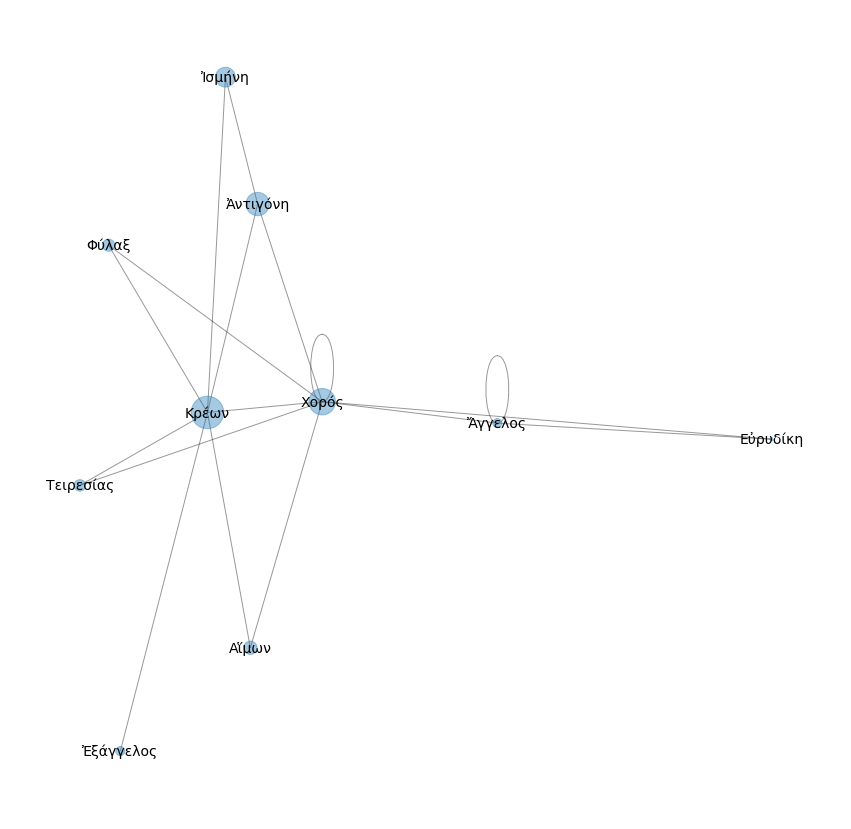

In [74]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G, pos, node_size=nodesizes, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G, pos, font_size=14) 
plt.axis('off');

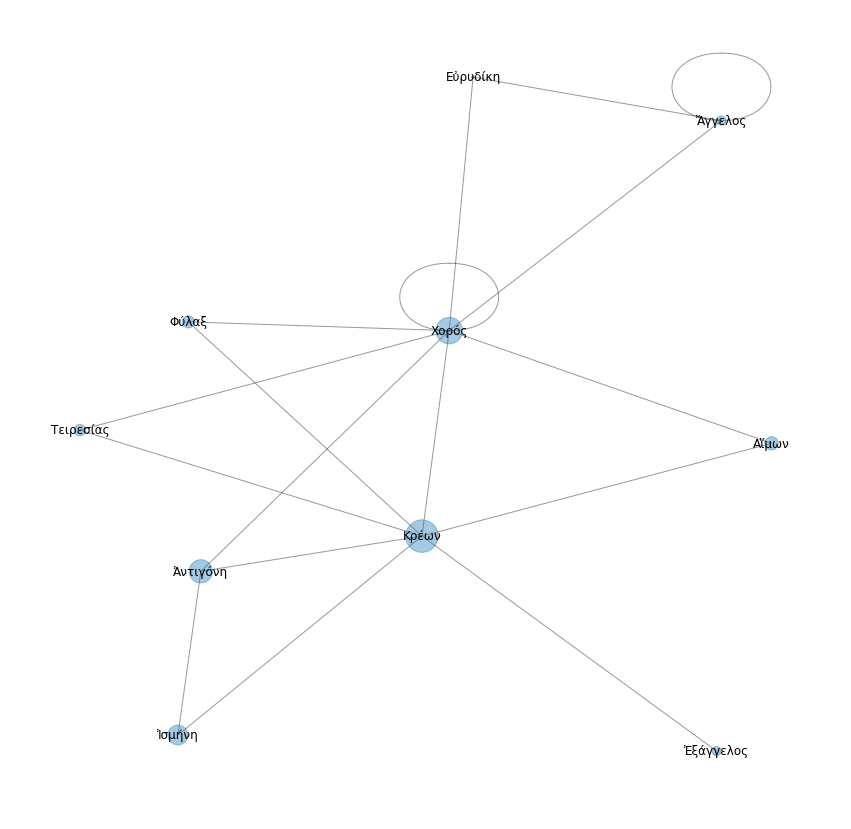

In [77]:
from copy import deepcopy
G0 = deepcopy(G)

for u, v, d in G0.edges(data=True):
    d['weight'] = 1

nodesizes = [interactions[speaker] * 5 for speaker in G0]

fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos)
plt.axis('off');

In [79]:
G0.remove_node('Χρος')

NetworkXError: The node Χόρος is not in the graph.

In [ ]:
fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nodesizes = [interactions[speaker] * 5 for speaker in G0]
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos, fontsize=14)
plt.axis('off');

In [35]:
for textpart in tree.iterfind('.//tei:div[@type="textpart"]', NSMAP):
        speakers = textpart.findall('.//tei:speaker', NSMAP)

In [50]:
print(lxml.etree.tostring(speakers).decode('utf-8'))

TypeError: Type 'list' cannot be serialized.